<h3>Building a Cancer Classifier using Random Forest</h3>

<h4>1- Load The Required Packages</h4>

In [77]:
import pandas as pd                                              #data manupilation
from sklearn.model_selection import train_test_split             #splitting the data to train and test
from sklearn import tree                                         #running a decision tree
from sklearn.ensemble import RandomForestClassifier              #running a random forest
from sklearn import datasets                                     #saved datasets

from sklearn import metrics                                      #assessing model performance
from sklearn.metrics import classification_report                #assessing model performance
from sklearn.metrics import confusion_matrix                     #assessing model performance
import matplotlib.pyplot as plt                                  #visualize model performance

pd.set_option('display.max_columns', 30)                         #display all columns in your data

<h4>2- Load The Data</h4>

In [59]:
cancer = datasets.load_breast_cancer()
X=pd.DataFrame(cancer.data,columns=[cancer.feature_names])      #define your features
Y=pd.Series(cancer.target)                                      #define the target variable
X.head()                                                        #view the first few rows from your features

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [60]:
#print the dimensions of the dataset
print(X.shape)

(569, 30)


<h4>3- Split to Train and Test</h4>

In [63]:
#split the data to 70% train and 30% test
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=42)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(398, 30)
(171, 30)
(398,)
(171,)


<h4>4- Train your model: Random Forest</h4>

In [70]:
rf_model = RandomForestClassifier(max_depth=3,n_estimators=15)        #define the model
rf_model.fit(x_train, y_train)                                        #fit the model (train)
rf_model.score(x_train,y_train)                                       #predict on new observations

#what is the accuracy of this model?

0.9723618090452262

Let's visualize this tree! (https://medium.com/@rnbrown/creating-and-visualizing-decision-trees-with-python-f8e8fa394176)

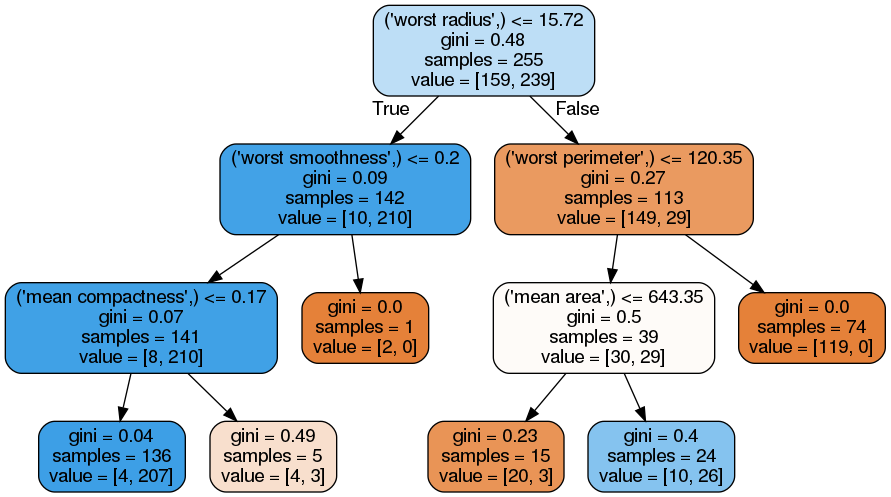

In [78]:
#select which tree do you want to visualize
selected_tree=2

from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
dot_data2 = StringIO()
export_graphviz(rf_model.estimators_[selected_tree],
                out_file=dot_data2,
                filled=True,
                precision=2,
                feature_names=x_train.columns,
                rounded=True)
graph = pydotplus.graph_from_dot_data(dot_data2.getvalue())
Image(graph.create_png())

<h4>5- Predict!</h4>

In [72]:
#what do the predictions look like?
rf_model.predict(x_test)

array([1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1])

In [75]:
#can we get the probability of each test case being malignant or benign? (display the first 10 lines)
rf_model.predict_proba(x_test)[0:10]

#do you see how the 0 and 1 were generated in the previous command?

array([[0.02066693, 0.97933307],
       [0.99200058, 0.00799942],
       [0.98991725, 0.01008275],
       [0.02226292, 0.97773708],
       [0.01474554, 0.98525446],
       [0.99142587, 0.00857413],
       [0.99142587, 0.00857413],
       [0.85028151, 0.14971849],
       [0.766319  , 0.233681  ],
       [0.01474554, 0.98525446]])

In [76]:
#what is the accuracy of the model on the test set?
rf_model.score(x_test,y_test)

0.9473684210526315

<center><h3>Congratulations! You have built your first classifier!</h3></center>
<center><h5>www.thecodinghive.com</h5></center>